# Chapter 10. 로지스틱 회귀의 심화
## 1. 다중 클래스와 소프트맥스 분류
### 01 - 다중클래스 분류의 개념
- **다중클래스 분류(multi-class classification)** 는 '2개 이상의 클래스를 가진 $y$값에 대한 분류'

#### 1.1 다중클래스와 다중레이블
- 다중클래스 분류에 대해 알아보기 전 다중클래스와 다중레이블의 차이점에 대해 알아야 함
    - 앞으로 접하게 될 문제 중 다중클래스(multi-class) 같지만 아닌 경우가 있음
        - 이를 **다중레이블(multi-label)**이라고 함
    - **다중클래스 분류**
        - 작업 : 2개 이상의 클래스를 가진 분류 작업
        - 중복 선택 : 중복 선택 불가능 -> [1 0 0]가능, [1 1 0]불가
        - 예 : 과일 사진 분류 : 오렌지, 사과, 배
    - **다중레이블 분류**
        - 작업 : 상호 배타적이지 않은 속성 예측
        - 중복 선택 : 중복 선택 가능 -> [1 1 0]가능
        - 예 : 신문기사 분류 : 운동선수 - 연예인 결혼 기사 -> 스포츠/연예 면

- 필요에 따라 다주을래스와 다중레이블에 대한 알고리즘을 모두 배우게 됨
    - 기본적으로 두 개의 알고리즘은 유사하면서도 마지막 분류 시점에서 확률을 어떻게 다룰지에 따라 다른 결과를 내는 특징이 있음

#### 1.2 분류 접근
- 머신러닝에서 다중클래스 분류 문제를 다룰 때 One-vs-All과 One-vs-One이라는 두 가지 접근법이 있음
    - **One-vs-All** : m개의 클래스가 존재할 때 각 클래스마다 분류기(classifier)를 생성하여 분류하는 기법
        - One-vs-Rest라고도 부름
        - 대표적인 분류 기법은 소프트맥스 분류(softmax classification)
    - **One-vs-One** : m개의 클래스가 있다면, 이 클래스의 분류기를 하나의 클래스로 하고 나머지 클래스의 분류기들을 만들어 최종적으로 각 분류기들의 결과를 투표로 결정하는 기법
        - 총 $\frac{m(m-1)}{2}$개 만큼의 분류기를 생성
        - 분류기가 많아짐에 따라 정확도는 올라가지만 분류기를 생성하는 비용이 증가

### 02 - 소프트맥스 분류
#### 2.1 소프트맥스 함수
- 시그모이드 함수를 사용하여 다중클래스 분류 문제를 충분히 다룰 수 있음
    - 시그모이드를 사용하여 각 클래스에 대해 해당 클래스에 속하는지 속하지 않는지에 대한 이진분류기 m개를 생성한 후, 각 클래스 중 가장 높은 확률이 나오는 클래스를 선택하면 됨
        - 수식으로 나타내면 $h_m(x;0)$
            - m은 각 클래스에 대한 분류기 번호
        - **하지만** 이런 방식으로 분류하면 $h_m(x;0)$의 확률의 합이 1 이상이 되는 문제 발생
- 위 문제를 해결하기 위해 모든 클래스들의 발생 확률을 1로 정규화시키는 방법이 있음
    - 이 때 사용하는 것이 **소프트맥스 함수(softmax function)**
        - 다중클래스 분류에서 여러 선형회귀의 출력 결과를 정규화하여 합이 1이 되도록 만드는 함수
        - $\sigma (z)_j = \frac{e^{z_j}}{\displaystyle\sum_{k = 1}^K {e^{z_k}}}$ for $j = 1, 2, 3, \dots, K$
            - 각각의 $\frac{e^{z_j}}{\displaystyle\sum_{k = 1}^K {e^{z_k}}}$ 값을 더하면 다음 수식처럼 그 합이 1이 됨
                - $\displaystyle\sum_{j = 1}^K \sigma(z)_j = \displaystyle\sum_{j = 1}^K P_j = 1$

- 위 수식을 코드로 표현하면 아래와 같음

In [1]:
import numpy as np

def softmax(values) :
    array_values = np.exp(values)
    return array_values / np.sum(array_values)

values = [2, 1, 5, 0.5]
y = softmax(values)
y.sum()

1.0

#### 2.2 소프트맥스 함수로 구현하는 소프트맥스 분류
- 소프트맥스 함수로 다중클래스 분류를 하기 위해서 기존 로지스틱 회귀의 컨셉을 제대로 이해해야 함

- 오즈비에 logit함수를 붙여 최종적으로 가중치 값을 구하면 다음과 같은 수식을 만들 수 있음
    - $\frac{P_j}{1 - P_j} = logit(P_j) = \log_e (\frac{P_j}{1 - P_j}) = z = \theta^T X$

- 소프트맥스 함수도 동일함
    - 기존 오즈비는 이진분류이지만, 다중클래스 분류는 j번째 대상에 대한 전체 대비 비율을 다음 수식과 같이 나타냄
        - $\frac{P_j}{P_K} \Rightarrow \log \ddot y (P_j) = \log_e (\frac{P_j}{P_K}) = z_j = X^T\theta_j$
        - $\frac{P_j}{P_K} = e^{z_j}$
    - 위 식을 정리하면 아래 수식으로 표현 가능
        - $\displaystyle\sum_{j = 1}^K {\frac{P_j}{P_K}} = \displaystyle\sum_{j = 1}^K e^{z_j} \Rightarrow \frac {1}{P_K} \displaystyle\sum_{j = 1}^K P_j = \displaystyle\sum_{j = 1}^K e^{z_j} \Rightarrow \frac{1}{P_K} \times 1 = \displaystyle\sum_{j = 1}^K e^{z_j} \Rightarrow (\because \displaystyle\sum_{j = 1}^K P_j = 1)$
        - $P_K = \frac{1}{\displaystyle\sum_{j = 1}^K e^{z_j}}$
    - 위 식의 마지막 수식과 $\frac{P_j}{P_K} = e^{z_j}$를 통합하면 아래처럼 $P_j$로 정의 가능
        - $\frac{P_j}{P_K} = e^{z_j} \Rightarrow \frac{P_j}{\displaystyle\sum_{j = 1}^K e^{z_j}} \Rightarrow \because P_K = \frac{1}{\displaystyle\sum_{j = 1}^K e^{z_j}}$
        - $P_j = \frac{e^{z_j}}{\displaystyle\sum_{j = 1}^K e^{z_j}}$
    - 최종적으로 $z_j$는 피쳐와 가중치 간의 선형결합이므로 다음과 같이 $P_j$로 표현 가능
        - $P_j = \frac{e^{z_j}}{\displaystyle\sum_{j = 1}^K e^{z_j}} = \frac{e^{z_j}}{\displaystyle\sum_{j = 1}^K e^{x^{T}\theta_j}}$
            - $\because z = X^{T}\theta_j$
        - $\theta$는 각 클래스별로 존재하는 모든 가중치 값의 모음을 하나의 행렬로 표현한 것

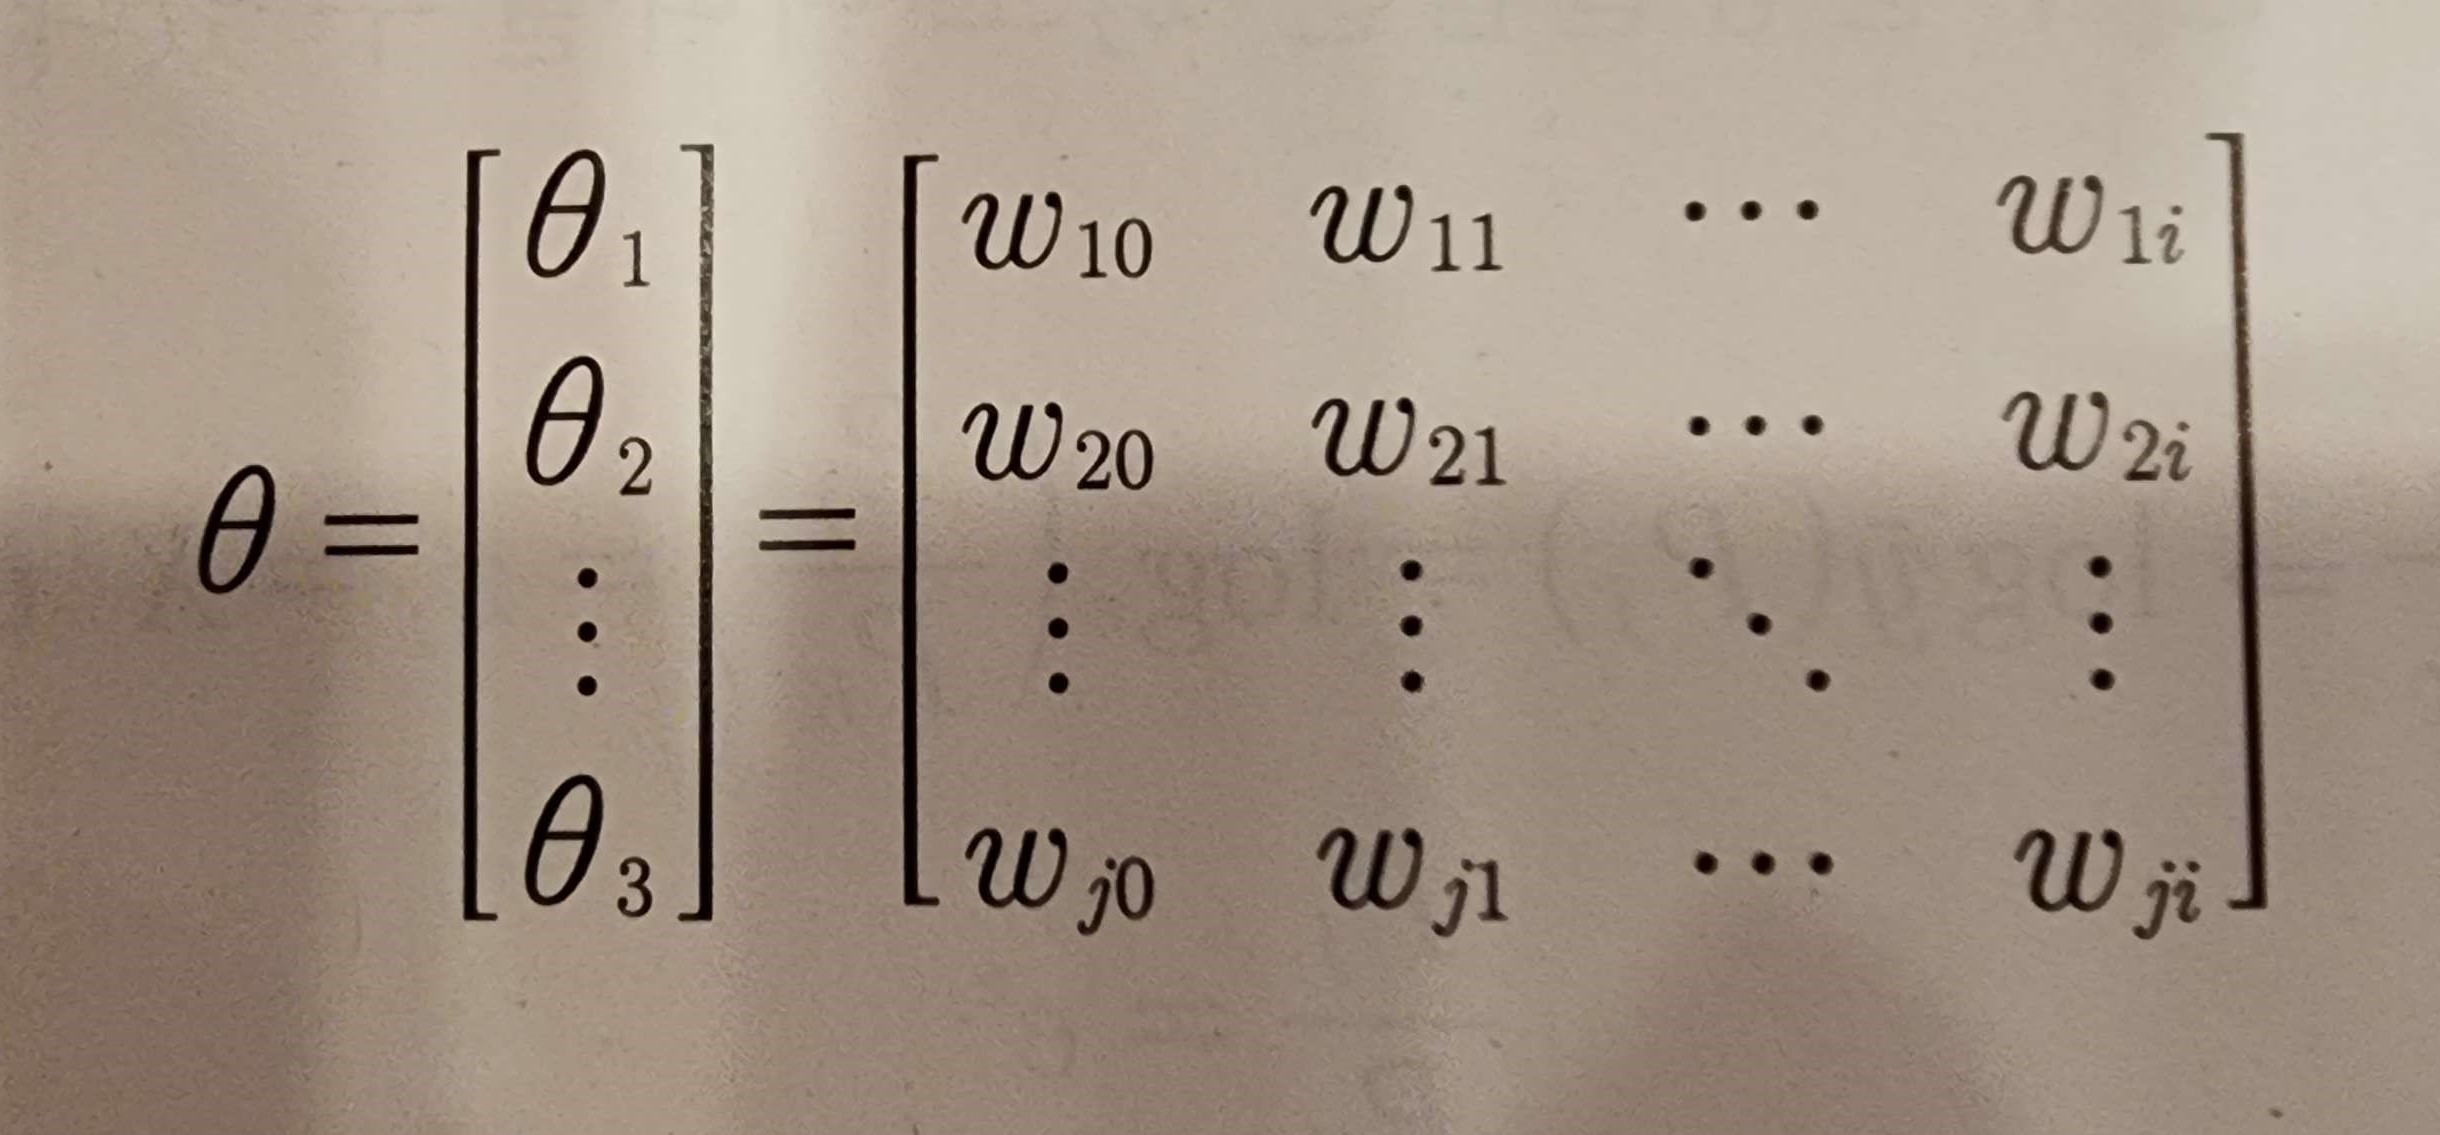

In [1]:
from IPython.display import Image
Image ("C:\Machine_Learning (git)\chapter10\Softmax Function 1.JPG")

### 03 - 소프트맥스 함수로 학습하기
- 소프트맥스 함수의 학습을 위해서는 먼저 다음 수식에서 $\theta$를 학습한다는 것을 의미
    - $P_j = \frac{e^{x^{T}\theta_j}}{\displaystyle\sum_{j = 1}^K e^{X^{T}\theta_j}}$
    - 결국 다음 수식에서 적절한 $\theta_j$를 찾아야 함
        - 각 클래스마다 바로 이 $\theta_j$를 찾는 것이 목표

- 이를 더 손쉽게 표현하면 각 가설함수는 다음과 같이 각 클래스와 발생확률로 표현이 가능

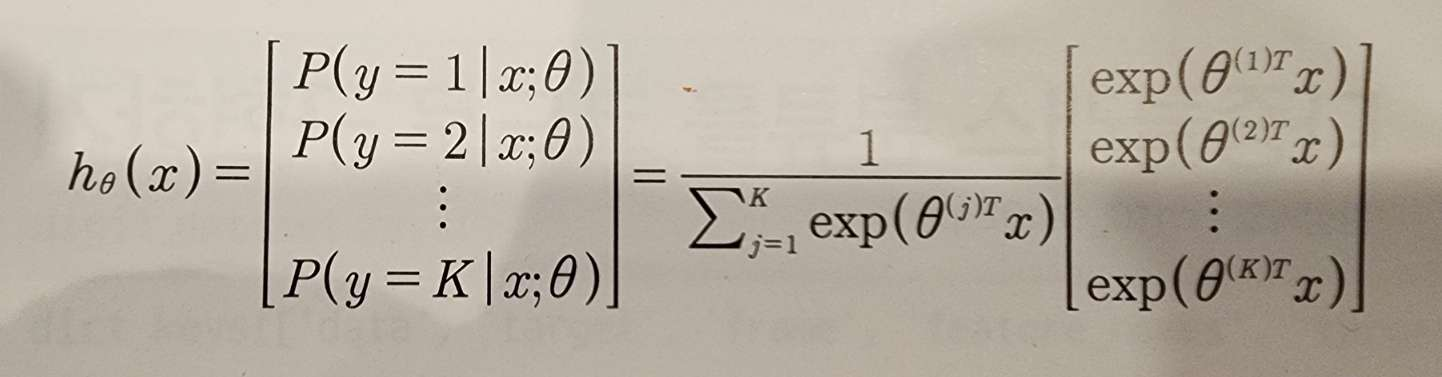

In [7]:
from IPython.display import Image
Image ("C:\Machine_Learning (git)\chapter10\Softmax Function 2.JPG")

- 최대우도추정법(Maximum Likelihood Estation, MLE)을 사용해서 $P_j$ 확률을 최대화하는 $\theta$를 찾는다 할 때 그 식을 아래와 같이 표현 가능
    - $\arg_\theta\max \Pi_{i = 1}^m P(y^{(i)} | x^{(i)};\theta)$

- 위 수식을 손실(loss)로 생각하여 수식 $L$로 표현하고 해당 값을 최대화 하는 방향으로 정리하면 다음 수식과 같음
- 다음 수식에서 $L$을 최대화하는 방향으로 학습할 때, 전체 데이터 $m$에 대하여 각 클래스 $j$에 대한 확률의 곱을 표현한 것이 $L$이라고 볼 수 있음
    - 이를 그대로 놔두면 연산이 어려워짐
        - $-$을 붙여주면 최대화가 아니라 최소화가 됨
        - $\log$를 붙이면 곱셈이 아닌 덧셈으로 최소화가 됨

- 다음 수식에서 $v_{ij}$는 $y^{(i)}$ 값이 가지는 클래스와 $j$의 클래스가 동일한 경우는 1, 그렇지 않으면 0으로 나타냄

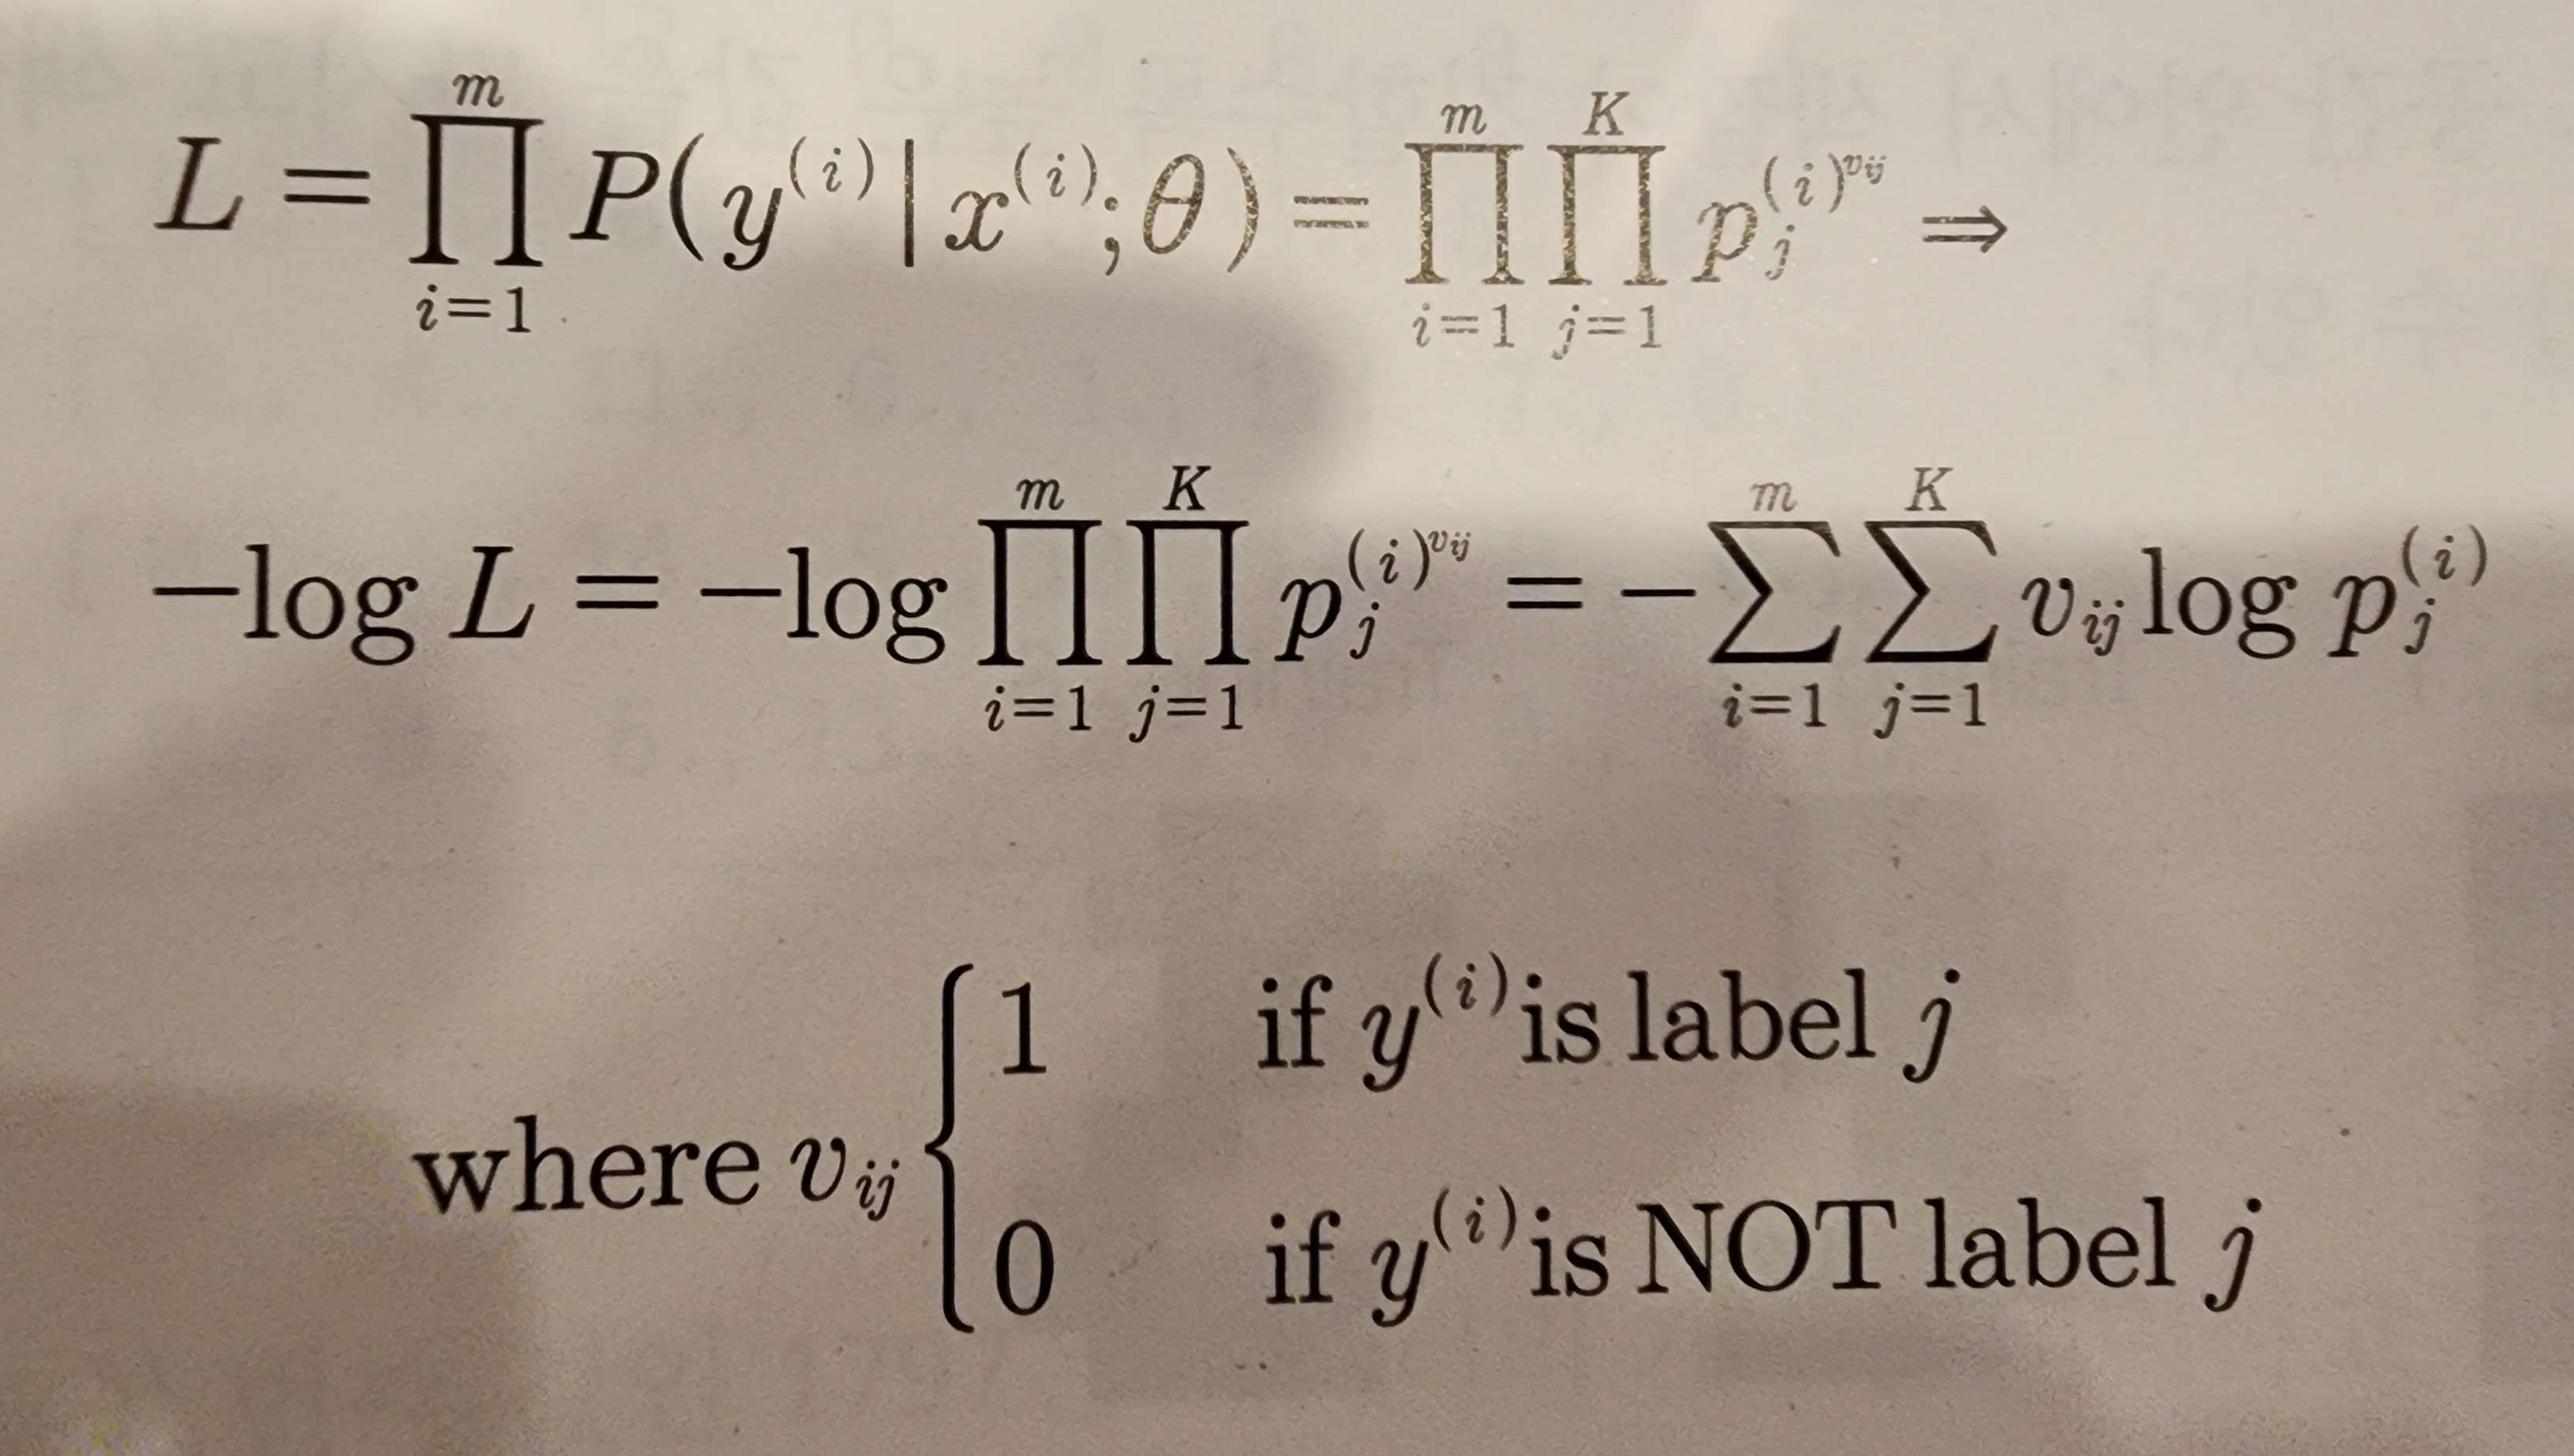

In [9]:
from IPython.display import Image
Image ("C:\Machine_Learning (git)\chapter10\Softmax Function 3.JPG")

- 결국 수식을 정리하면 다음과 같이 단순화시킬 수 있음
    - $l = -\displaystyle\sum_{i = 1}^m\displaystyle\sum_{j = 1}^K v_{ij}\log {p_j}^{(i)} \quad where {p_j}^{(i)} = \frac{e^{{z_j}^{(i)}}}{\displaystyle\sum_{j = 1}^K e^{{z_j}^{(i)}}}$

- 우리가 최종적으로 구하고자 하는 연산은 $\frac{\partial l}{\partial z} \frac{\partial z}{\partial \theta}$으로 먼저 손실(loss)과 $z$값 간의 미분과 $z, \theta$간의 미분을 해야하는 수식